In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
data = pd.read_csv('전처리완료데이터.csv', low_memory = False).iloc[:,1:]
data

,BERTH_PLAN_LOG_ID,TERMINAL,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,REG_DATE,...,접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량
0,1198857,BNCT,CATO,5,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,2020-01-01 00:06:05,...,0,0,0,4,2234.0,2019,12,30,10,1727
1,1198903,PNIT,DWFM,32,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,2020-01-01 01:06:56,...,0,0,0,3,480.0,2019,12,31,17,196
2,1198958,PNC,ONIS,30,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,2020-01-01 05:06:55,...,0,0,0,6,1260.0,2019,12,31,11,1896
3,1198998,HJIT,DPUX,1,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,2020-01-01 07:06:39,...,0,2,1,0,260.0,2020,1,1,1,238
4,1199009,HPNT,HHBS,1,2019-12-31 11:12:00,2020-01-01 04:00:00,405,641,120,2020-01-01 07:36:25,...,2,0,0,2,1008.0,2019,12,31,11,1166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60580,3545253,GWCT,SMLB,1,2022-08-08 12:30:00,2022-08-09 02:00:00,273,577,92,2022-08-08 18:45:27,...,0,0,0,4,810.0,2022,8,8,12,942
60581,3545254,GWCT,NITR,10,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,2022-08-08 18:45:27,...,0,0,0,4,570.0,2022,8,8,21,365
60582,3545255,GWCT,DYHY,13,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,2022-08-08 18:45:27,...,0,0,0,4,420.0,2022,8,9,8,124
60583,3545257,PNC,MGUD,3,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,2022-08-08 18:45:27,...,0,0,0,6,1200.0,2022,8,9,7,2041


In [3]:
df = data.groupby('TERMINAL').sum()[['작업시간(분)', '총 작업량']]
df['효율'] = df['작업시간(분)'] / df['총 작업량']
df = df['효율']
df

TERMINAL
BCT     1.762871
BIT     1.696202
BNCT    0.930099
BNMT    3.606419
BPTC    1.859703
DDCT    2.534563
DPCT    1.647208
E1CT    1.301803
GWCT    1.329497
HJIT    1.056305
HJNC    0.668634
HKTL    1.801702
HPNT    0.840360
ICT     1.097177
IFPC    2.673180
IGCT    2.939656
JUCT    1.290564
KITL    1.142821
PCTC    1.522005
PNC     0.730502
PNCT    1.720310
PNIT    0.794695
SMGT    1.675395
SNCT    1.337962
UNCT    3.097202
Name: 효율, dtype: float64

In [4]:
data = pd.merge(data, df, on = ['TERMINAL'], how = 'left')
data

,BERTH_PLAN_LOG_ID,TERMINAL,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,REG_DATE,...,접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량,효율
0,1198857,BNCT,CATO,5,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,2020-01-01 00:06:05,...,0,0,4,2234.0,2019,12,30,10,1727,0.930099
1,1198903,PNIT,DWFM,32,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,2020-01-01 01:06:56,...,0,0,3,480.0,2019,12,31,17,196,0.794695
2,1198958,PNC,ONIS,30,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,2020-01-01 05:06:55,...,0,0,6,1260.0,2019,12,31,11,1896,0.730502
3,1198998,HJIT,DPUX,1,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,2020-01-01 07:06:39,...,2,1,0,260.0,2020,1,1,1,238,1.056305
4,1199009,HPNT,HHBS,1,2019-12-31 11:12:00,2020-01-01 04:00:00,405,641,120,2020-01-01 07:36:25,...,0,0,2,1008.0,2019,12,31,11,1166,0.840360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60580,3545253,GWCT,SMLB,1,2022-08-08 12:30:00,2022-08-09 02:00:00,273,577,92,2022-08-08 18:45:27,...,0,0,4,810.0,2022,8,8,12,942,1.329497
60581,3545254,GWCT,NITR,10,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,2022-08-08 18:45:27,...,0,0,4,570.0,2022,8,8,21,365,1.329497
60582,3545255,GWCT,DYHY,13,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,2022-08-08 18:45:27,...,0,0,4,420.0,2022,8,9,8,124,1.329497
60583,3545257,PNC,MGUD,3,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,2022-08-08 18:45:27,...,0,0,6,1200.0,2022,8,9,7,2041,0.730502


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60585 entries, 0 to 60584
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BERTH_PLAN_LOG_ID  60585 non-null  int64  
 1   TERMINAL           60585 non-null  object 
 2   VESSEL_CD          60585 non-null  object 
 3   VOYAGE             60585 non-null  int64  
 4   BERTHN_DTM         60585 non-null  object 
 5   DEP_DTM            60585 non-null  object 
 6   LOD_CNT            60585 non-null  int64  
 7   DIS_CNT            60585 non-null  int64  
 8   SHFT_CNT           60585 non-null  int64  
 9   REG_DATE           60585 non-null  object 
 10  기온(°C)             60585 non-null  float64
 11  강수량(mm)            60585 non-null  float64
 12  풍속(m/s)            60585 non-null  float64
 13  위치                 60585 non-null  object 
 14  부두길이(m)            60585 non-null  float64
 15  전면수심(m)            60585 non-null  float64
 16  부지면적(^m)           605

In [6]:
data.describe()

,BERTH_PLAN_LOG_ID,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),풍속(m/s),부두길이(m),전면수심(m),...,접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량,효율
count,6.058500e+04,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,...,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000
mean,2.376542e+06,13.567550,405.205034,410.074986,20.606718,15.051789,0.178703,2.845877,1202.456615,15.760725,...,0.286391,0.155302,3.149047,963.026228,2020.854865,6.058612,15.789998,11.415169,835.886738,1.444909
std,8.587231e+05,33.905181,486.443584,505.430018,100.557508,8.975195,1.601741,1.703645,399.855805,1.304186,...,0.706030,0.544649,1.971330,622.783766,0.783268,3.348889,8.840416,6.752493,919.607690,0.641719
min,1.198857e+06,0.000000,0.000000,0.000000,0.000000,-17.500000,0.000000,0.000000,259.000000,10.000000,...,0.000000,0.000000,0.000000,10.000000,2019.000000,1.000000,1.000000,0.000000,1.000000,0.668634
25%,1.540565e+06,2.000000,123.000000,114.000000,0.000000,8.300000,0.000000,1.700000,920.000000,15.000000,...,0.000000,0.000000,2.000000,540.000000,2020.000000,3.000000,8.000000,6.000000,281.000000,0.930099
50%,2.280652e+06,6.000000,247.000000,260.000000,0.000000,15.700000,0.000000,2.600000,1224.000000,16.000000,...,0.000000,0.000000,4.000000,840.000000,2021.000000,6.000000,16.000000,11.000000,532.000000,1.329497
75%,3.256673e+06,16.000000,478.000000,494.000000,0.000000,22.400000,0.000000,3.700000,1447.000000,16.500000,...,0.000000,0.000000,5.000000,1230.000000,2021.000000,9.000000,23.000000,17.000000,1000.000000,1.801702
max,3.545257e+06,999.000000,5504.000000,6401.000000,2549.000000,35.400000,70.400000,13.800000,2000.000000,18.000000,...,3.000000,7.000000,6.000000,9516.000000,2022.000000,12.000000,31.000000,23.000000,9669.000000,3.606419


In [7]:
# 시각화 한글폰트 깨짐 방지
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\WINDOWS\\Fonts\\taile.ttf',
 'C:\\WINDOWS\\Fonts\\msyhl.ttc',
 'C:\\Windows\\Fonts\\constan.ttf',
 'C:\\Windows\\Fonts\\framdit.ttf',
 'C:\\Windows\\Fonts\\COPRGTB.TTF',
 'C:\\WINDOWS\\Fonts\\WINGDNG3.TTF',
 'C:\\WINDOWS\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\BOOKOSBI.TTF',
 'C:\\Windows\\Fonts\\tahomabd.ttf',
 'C:\\WINDOWS\\Fonts\\corbelb.ttf',
 'C:\\WINDOWS\\Fonts\\HanSantteutDotum-Bold.ttf',
 'C:\\Windows\\Fonts\\HTOWERTI.TTF',
 'C:\\Windows\\Fonts\\constani.ttf',
 'C:\\WINDOWS\\Fonts\\georgiaz.ttf',
 'C:\\WINDOWS\\Fonts\\Candaral.ttf',
 'C:\\Windows\\Fonts\\BAUHS93.TTF',
 'C:\\WINDOWS\\Fonts\\CENSCBK.TTF',
 'C:\\WINDOWS\\Fonts\\MSUIGHUB.TTF',
 'C:\\WINDOWS\\Fonts\\constan.ttf',
 'C:\\WINDOWS\\Fonts\\courbi.ttf',
 'C:\\Windows\\Fonts\\calibrii.ttf',
 'C:\\Windows\\Fonts\\REFSAN.TTF',
 'C:\\Windows\\Fonts\\Gabriola.ttf',
 'C:\\WINDOWS\\Fonts\\DUBAI-LIGHT.TTF',
 'C:\\WINDOWS\\Fonts\\LFAXI.TTF',
 'C:\\Windows\\Fonts\\BELLI.TTF',
 'C:\\Windows\\Fonts\\bahnschrift.ttf',
 'C:\\W

In [8]:
import matplotlib


fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

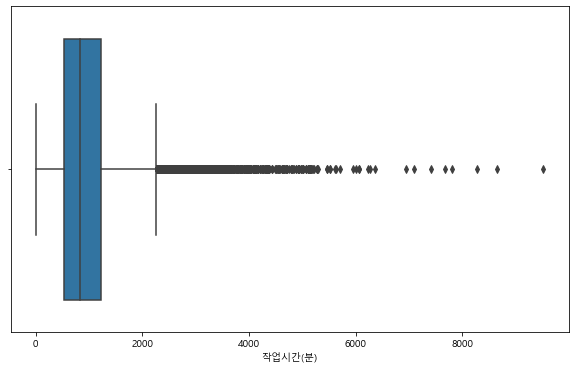

In [9]:
plt.figure(figsize = (10,6))
sns.boxplot(data['작업시간(분)'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

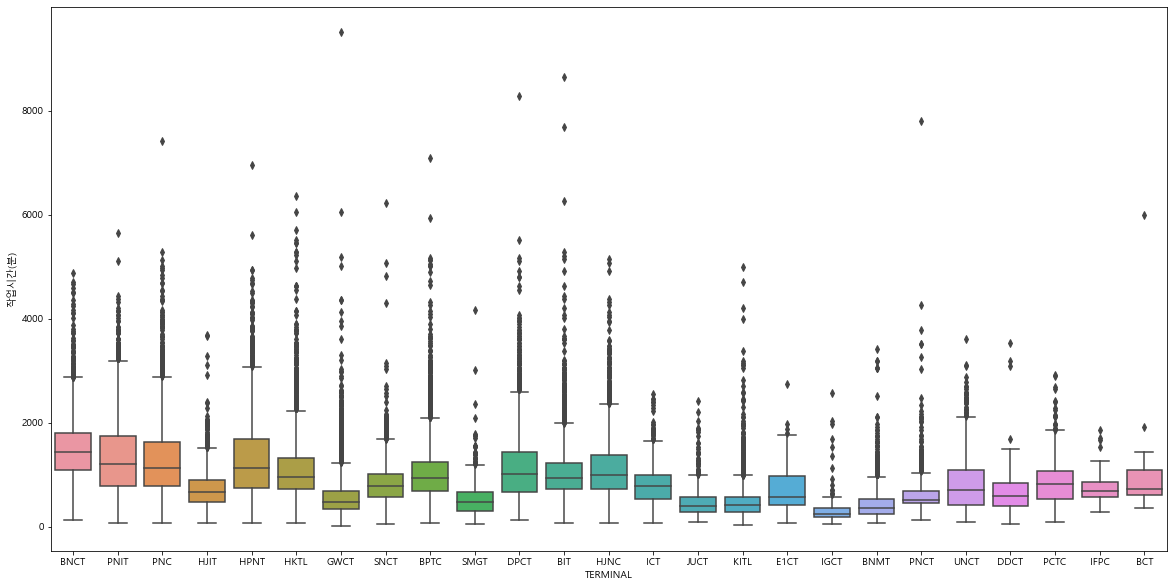

In [10]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['TERMINAL'], data['작업시간(분)'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

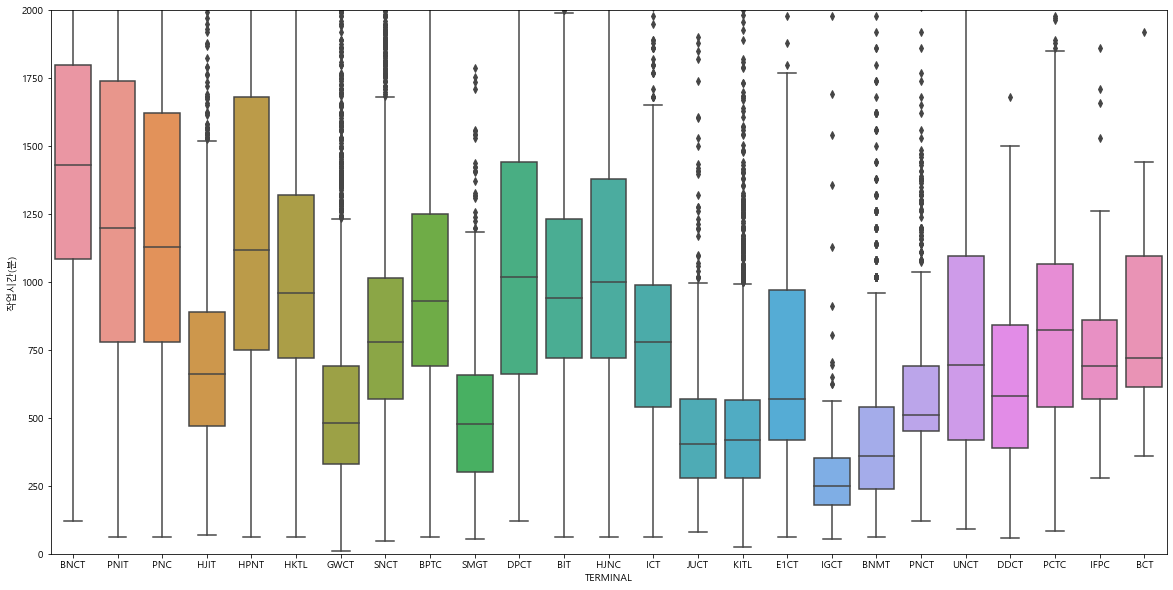

In [11]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['TERMINAL'], data['작업시간(분)'])
plt.ylim(0,2000)
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

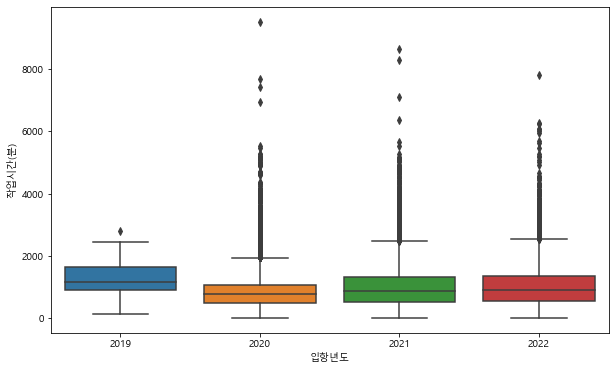

In [12]:
plt.figure(figsize = (10,6))
sns.boxplot(data['입항년도'], data['작업시간(분)'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

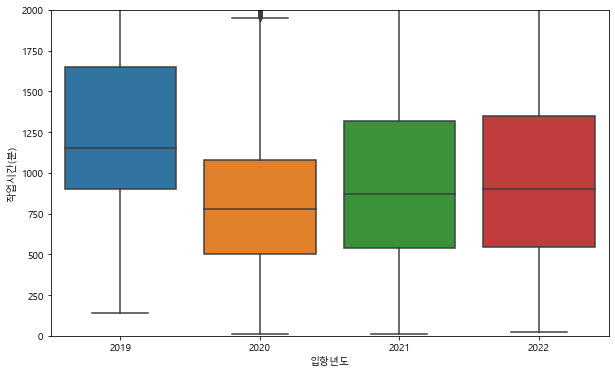

In [13]:
plt.figure(figsize = (10,6))
sns.boxplot(data['입항년도'], data['작업시간(분)'])
plt.ylim(0,2000)
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

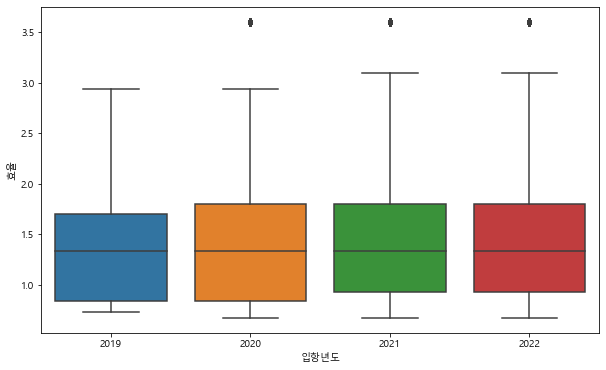

In [14]:
plt.figure(figsize = (10,6))
sns.boxplot(data['입항년도'], data['효율'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

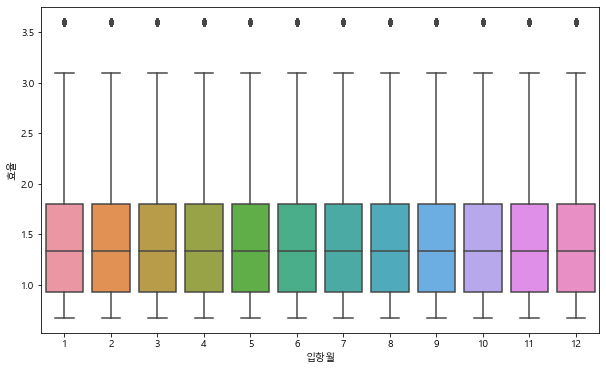

In [15]:
plt.figure(figsize = (10,6))
sns.boxplot(data['입항월'], data['효율'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

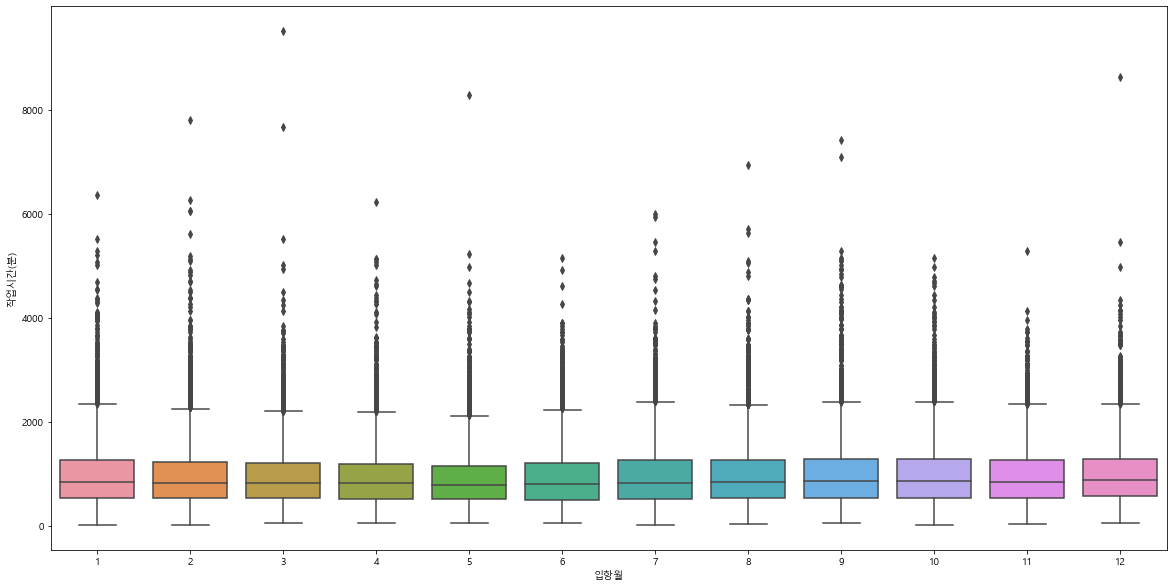

In [16]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['입항월'], data['작업시간(분)'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

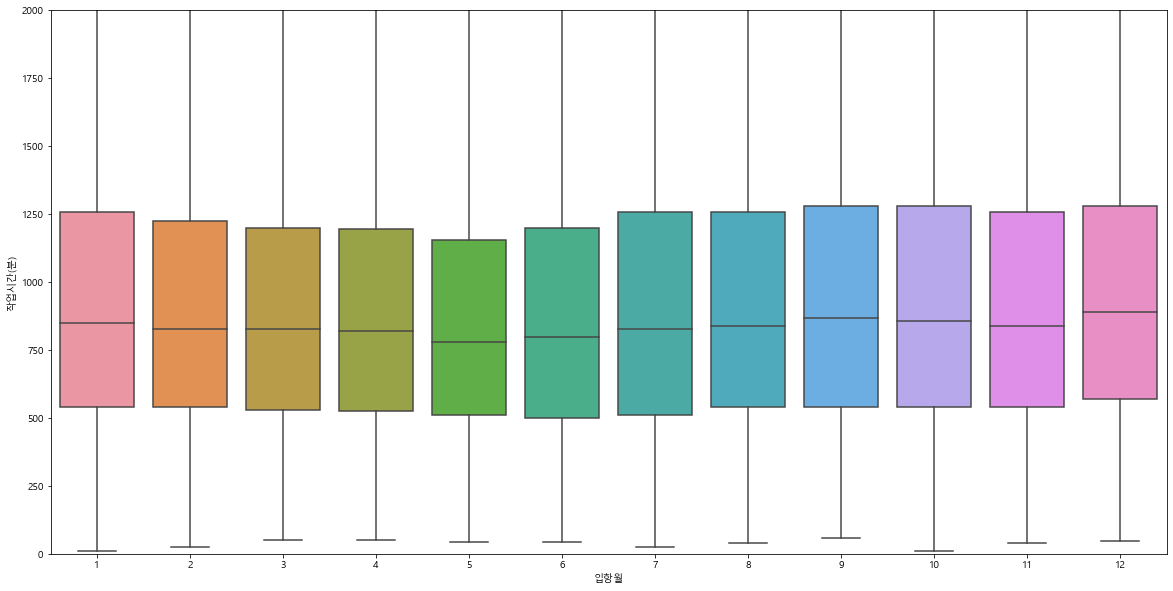

In [17]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['입항월'], data['작업시간(분)'])
plt.ylim(0,2000)
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

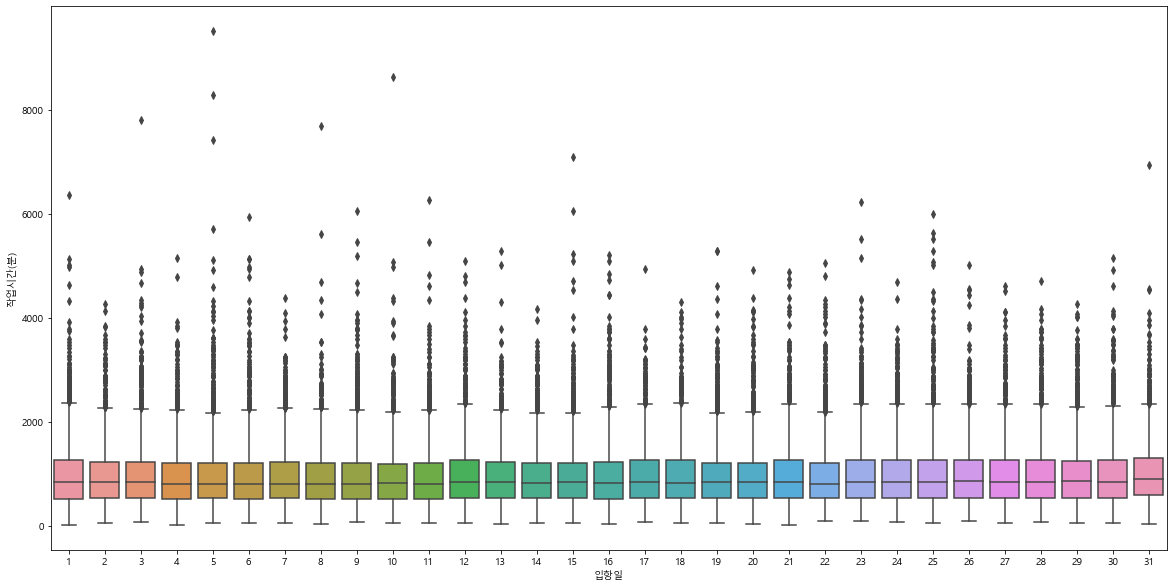

In [18]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['입항일'], data['작업시간(분)'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

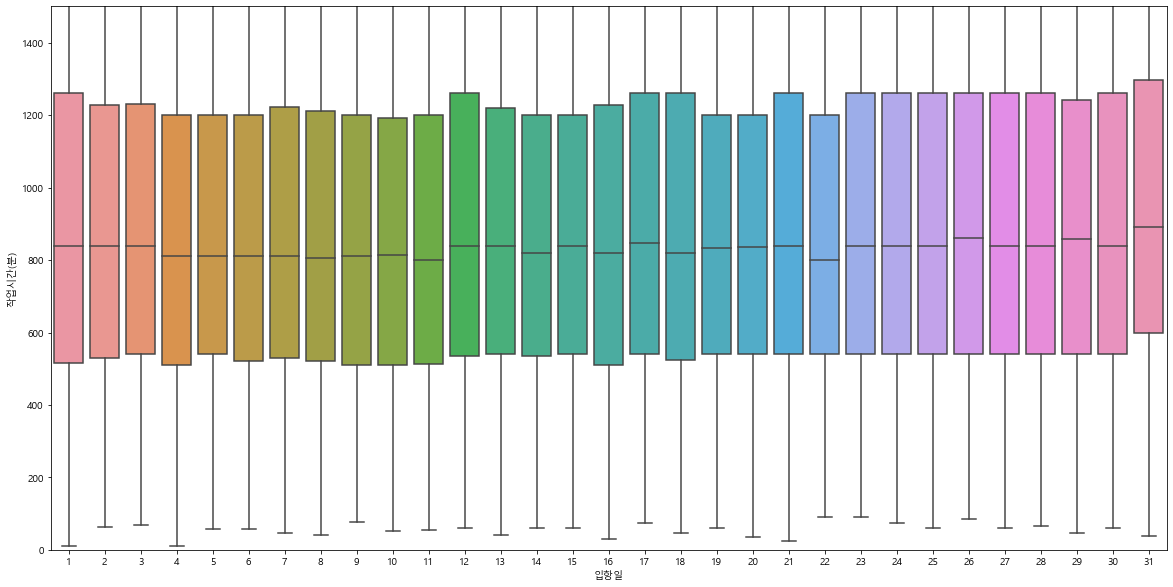

In [19]:
plt.figure(figsize = (20, 10))
plt.ylim(0,1500)
sns.boxplot(data['입항일'], data['작업시간(분)'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

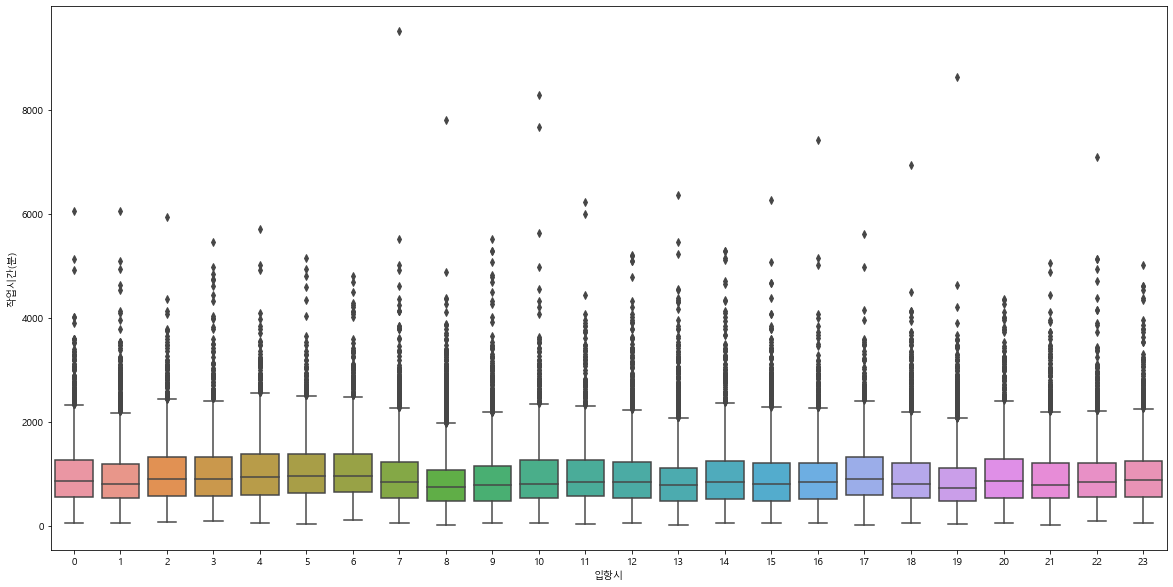

In [20]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['입항시'], data['작업시간(분)'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

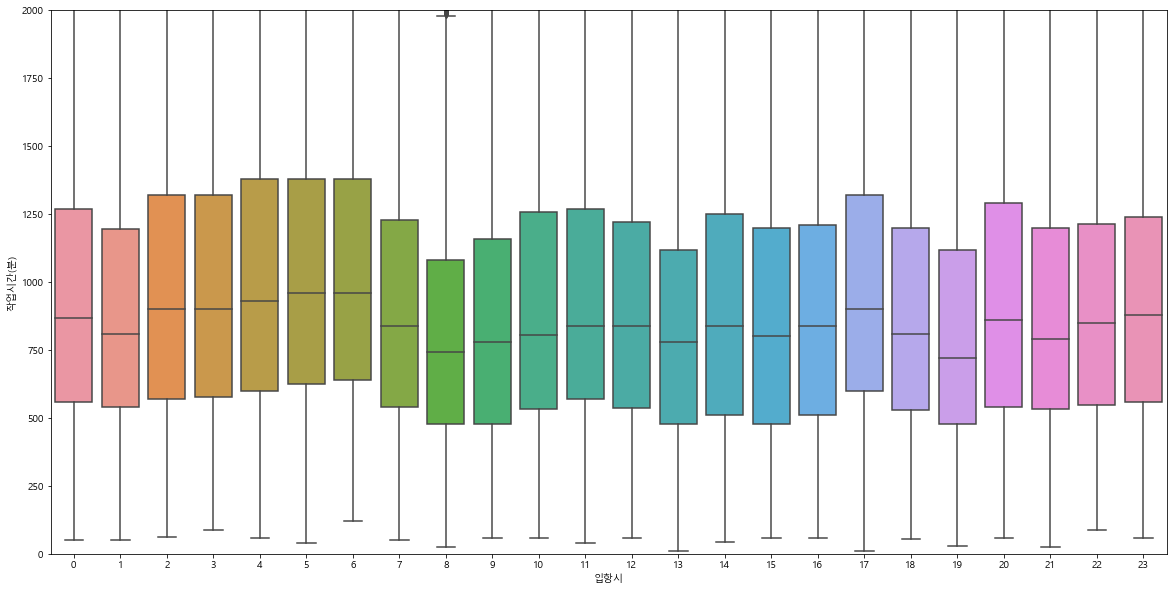

In [21]:
plt.figure(figsize = (20, 10))
plt.ylim(0,2000)
sns.boxplot(data['입항시'], data['작업시간(분)'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

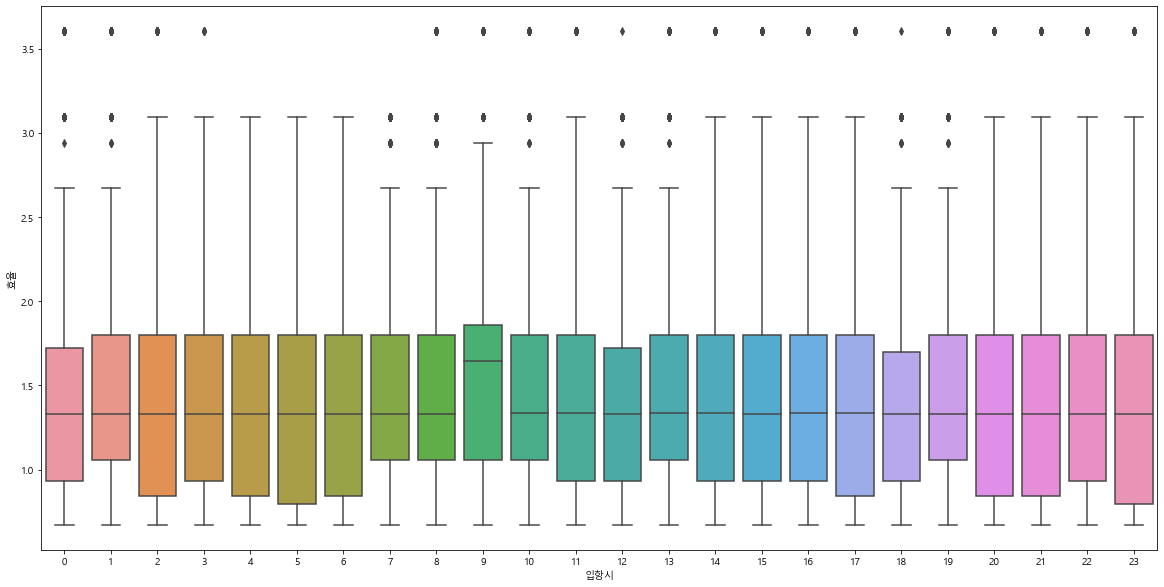

In [22]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['입항시'], data['효율'])
plt.plot()

C:\Users\N\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\N\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


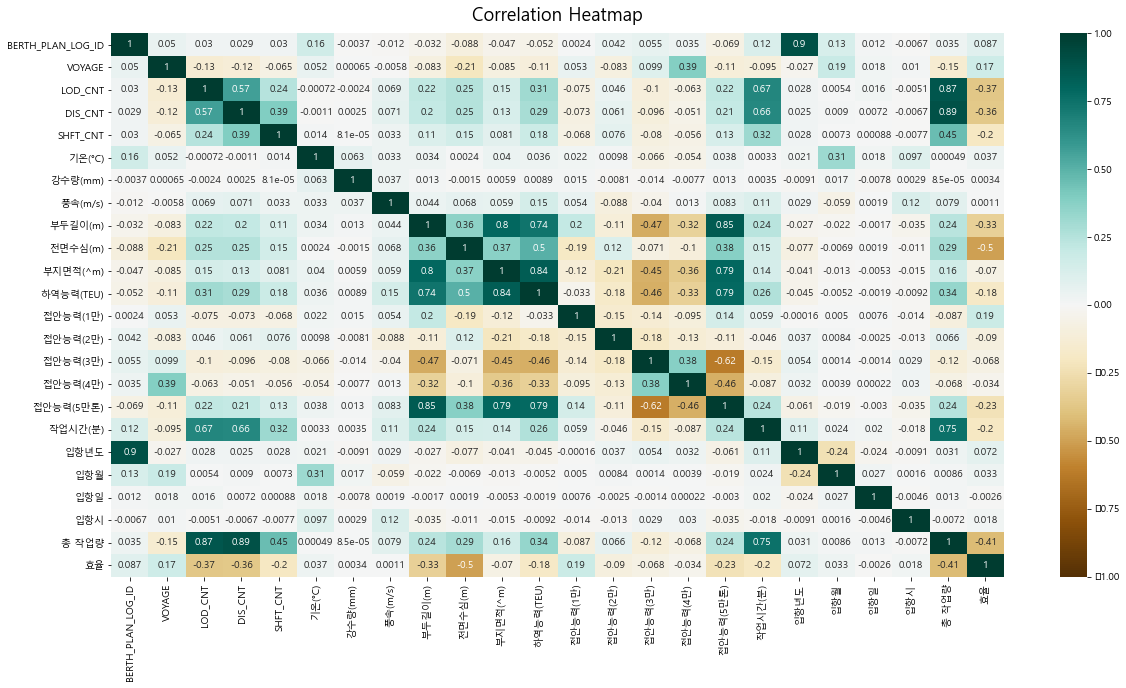

In [23]:
plt.figure(figsize = (20,10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')  # Seaborn depends many of its utility with Matplotlib library. Seaborn is just more pretty
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


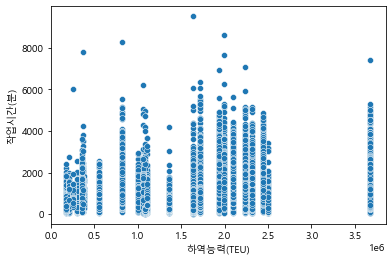

In [24]:
sns.scatterplot(data['하역능력(TEU)'], data['작업시간(분)'])
plt.show()

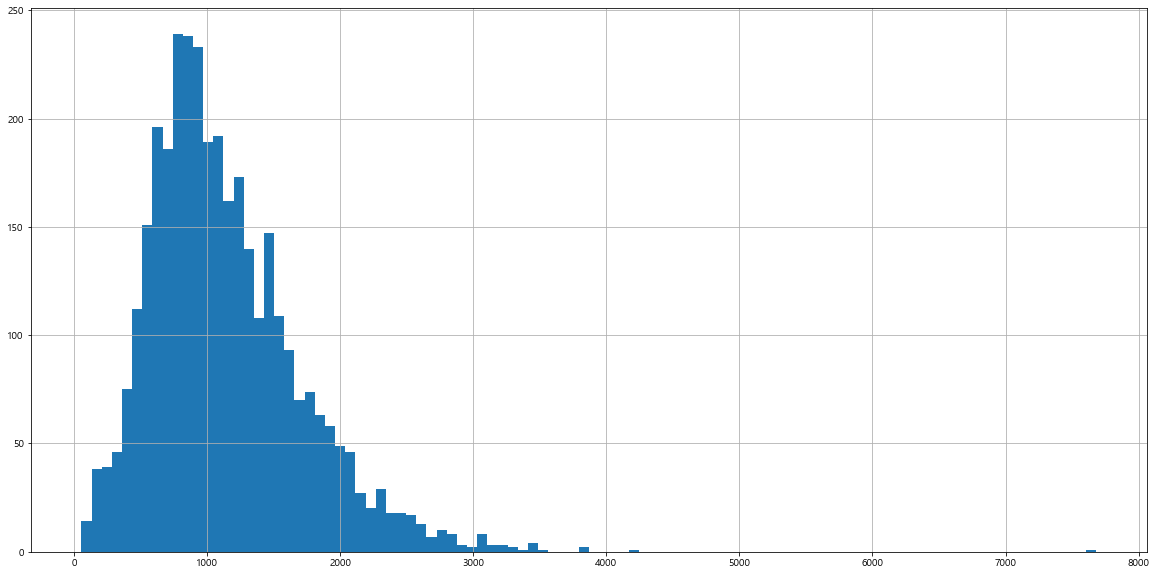

In [25]:
plt.figure(figsize = (20, 10))


data.groupby('VESSEL_CD').mean()['작업시간(분)'].hist(bins = 100)
plt.show()

In [26]:
data.groupby('입항월').mean()['효율'].sort_values(ascending = False)

입항월
9     1.487973
11    1.480511
10    1.480019
8     1.471728
7     1.456480
12    1.449161
6     1.439389
5     1.434997
4     1.427133
3     1.421210
1     1.417711
2     1.411587
Name: 효율, dtype: float64

In [27]:
data.groupby('VESSEL_CD').mean()['작업시간(분)'].sort_values(ascending = False)

VESSEL_CD
B246    7680.000000
HOCO    4182.777778
JSRX    3840.000000
PLGR    3800.000000
HODU    3510.777778
           ...     
KS31      60.000000
D125      60.000000
TEOS      60.000000
SHZH      60.000000
YHFD      54.000000
Name: 작업시간(분), Length: 3438, dtype: float64

In [28]:
data.groupby('TERMINAL').mean()['작업시간(분)'].sort_values(ascending = False)

TERMINAL
BNCT    1502.360193
PNIT    1348.841578
HPNT    1309.233455
PNC     1270.417438
DPCT    1154.050367
HJNC    1118.062242
HKTL    1073.193416
BPTC    1027.576878
BIT     1025.498890
BCT      997.058824
PCTC     852.389886
SNCT     839.939683
UNCT     824.371429
ICT      800.152766
IFPC     722.541436
HJIT     704.791681
E1CT     698.007160
DDCT     670.125000
PNCT     669.665000
GWCT     589.685795
SMGT     532.931034
KITL     476.169018
JUCT     457.313242
BNMT     453.291328
IGCT     337.409091
Name: 작업시간(분), dtype: float64

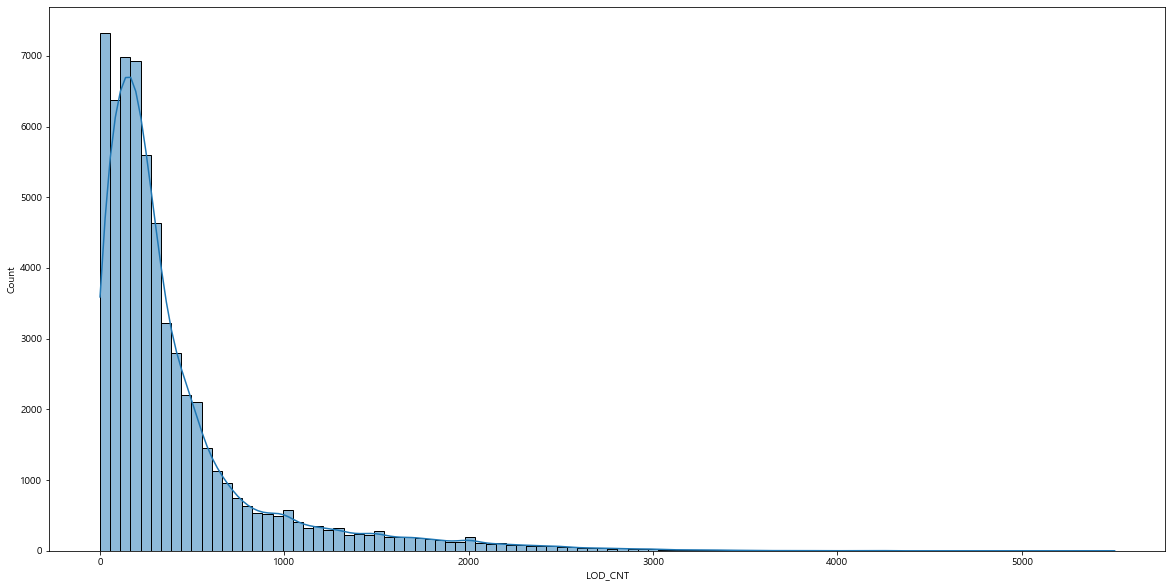

In [29]:
plt.figure(figsize = (20, 10))
sns.histplot(data['LOD_CNT'], kde = True, bins = 100)
plt.show()

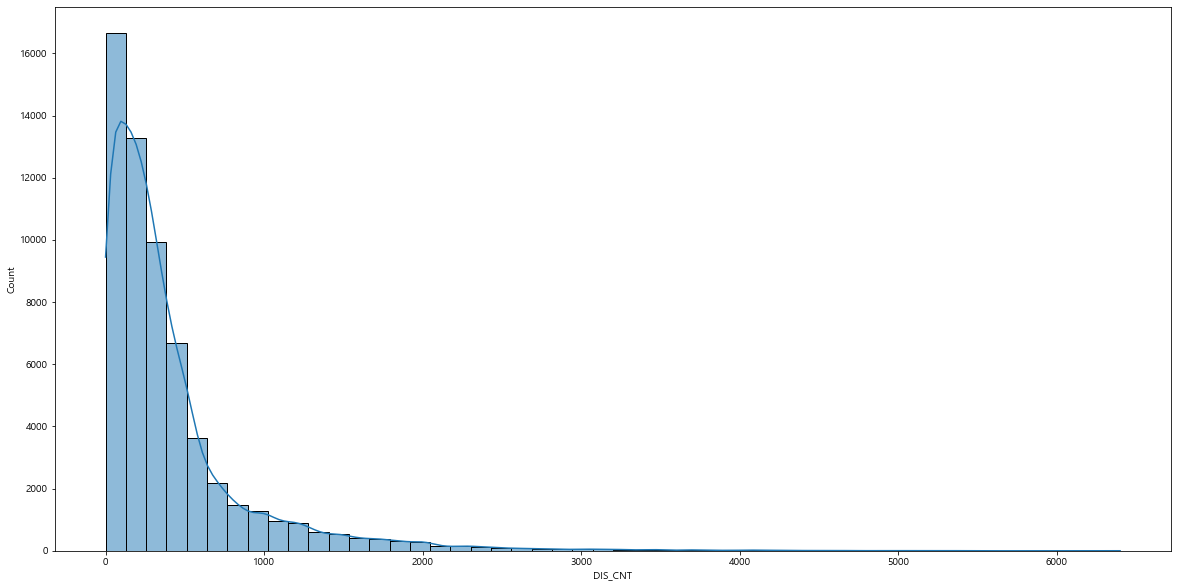

In [30]:
plt.figure(figsize = (20, 10))
sns.histplot(data['DIS_CNT'], kde = True, bins = 50)
plt.show()

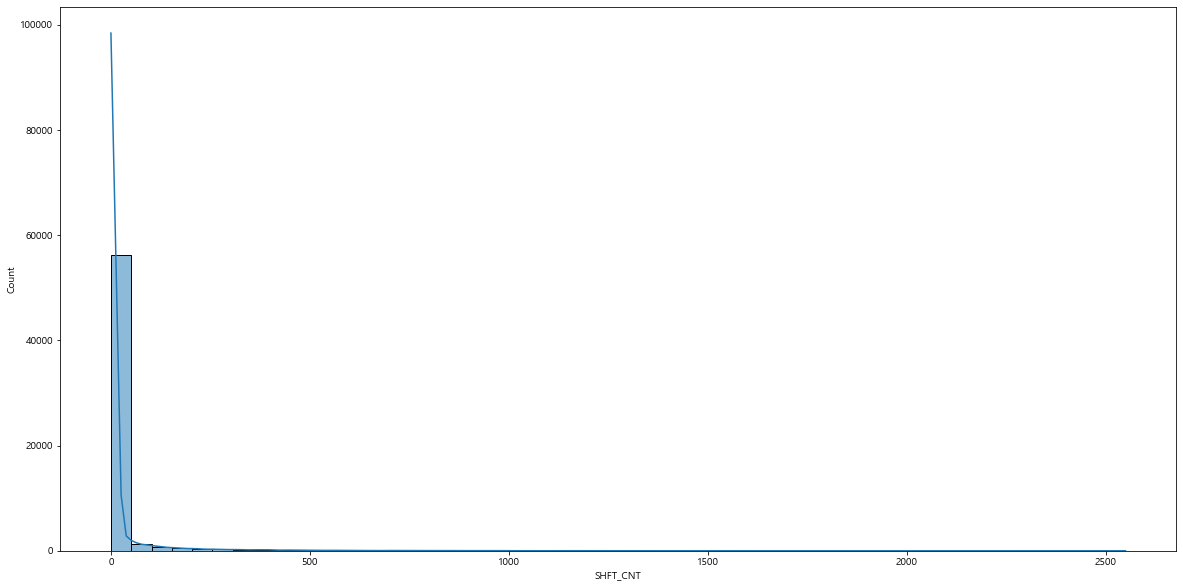

In [31]:
plt.figure(figsize = (20, 10))
sns.histplot(data['SHFT_CNT'], kde = True, bins = 50)
plt.show()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


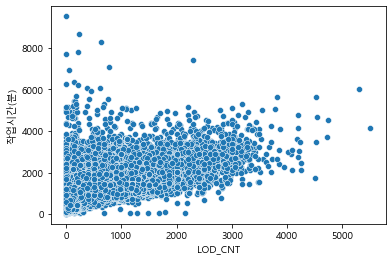

In [32]:
sns.scatterplot(data['LOD_CNT'], data['작업시간(분)'])
plt.show()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


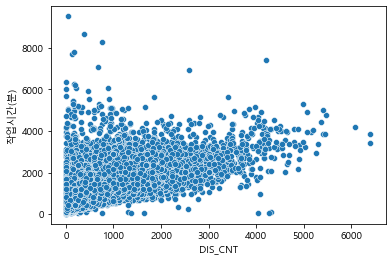

In [33]:
sns.scatterplot(data['DIS_CNT'], data['작업시간(분)'])
plt.show()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


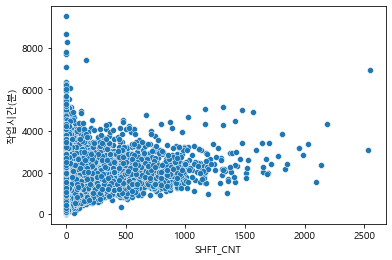

In [34]:
sns.scatterplot(data['SHFT_CNT'], data['작업시간(분)'])
plt.show()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

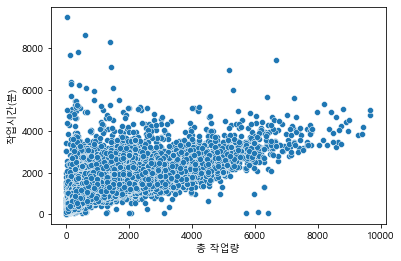

In [35]:
sns.scatterplot(data['총 작업량'], data['작업시간(분)'])
plt.plot()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-pack

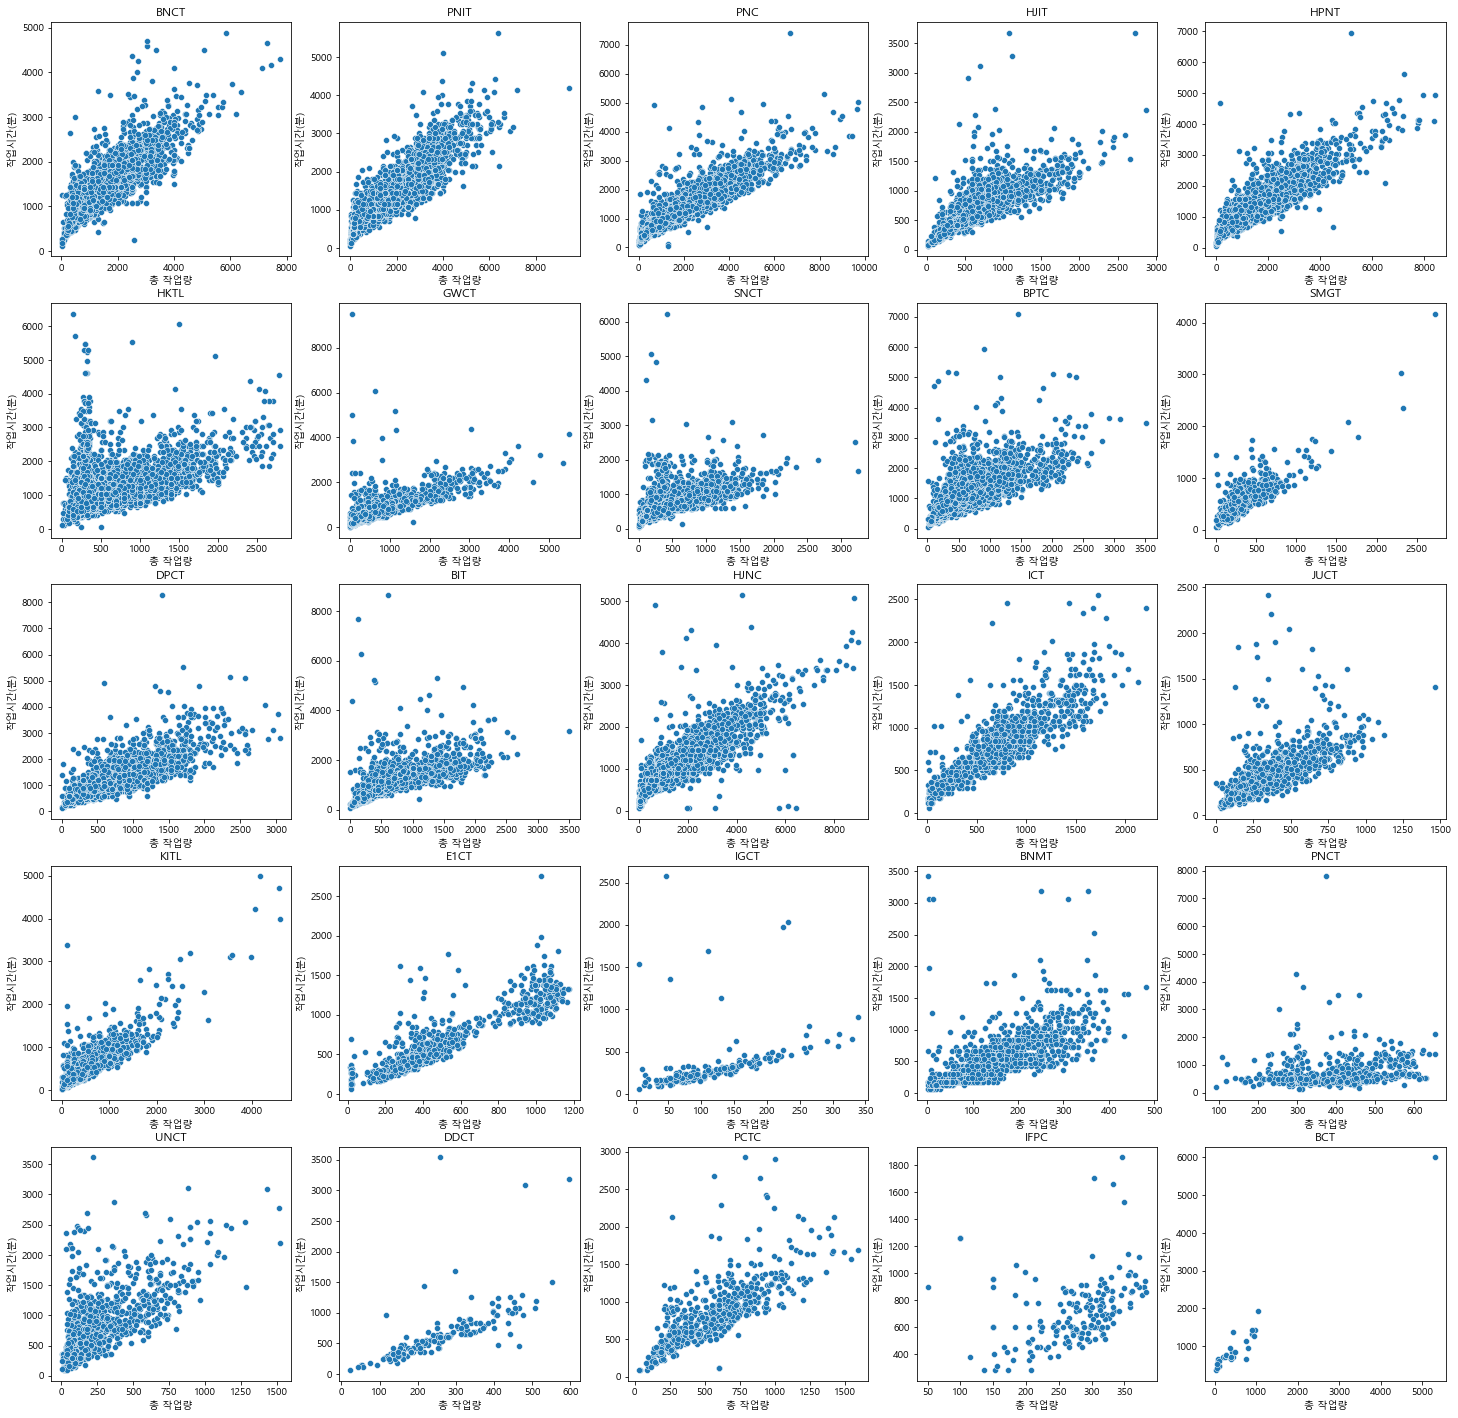

In [36]:
# Terminal 별 작업량과 작업시간의 상관관계 
terminals = list(data['TERMINAL'].unique())
plt.figure(figsize = (25, 25))

for i, terminal in enumerate(terminals):
    dummy = data[data['TERMINAL'] == terminal]
    plt.subplot(5, 5, i+1)
    sns.scatterplot(dummy['총 작업량'], data['작업시간(분)'])
    plt.title(terminal)
plt.show()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-pack

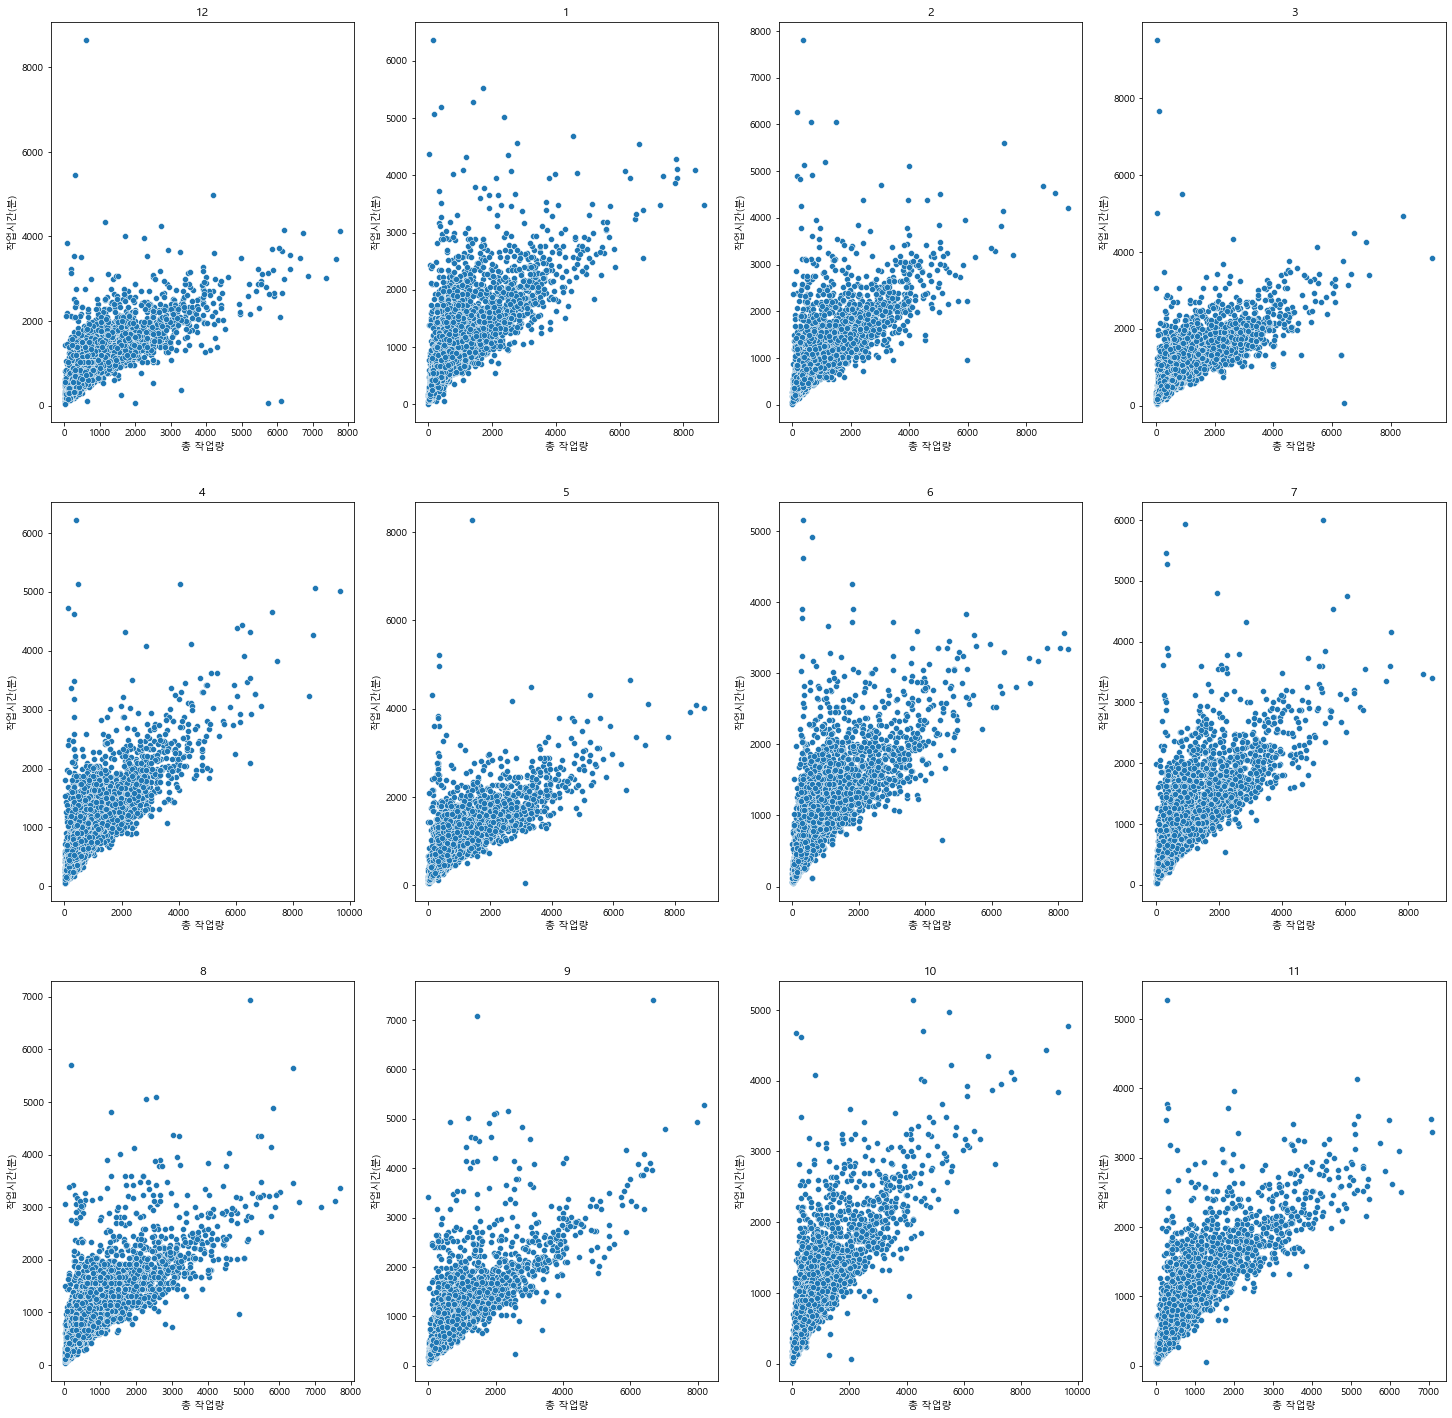

In [37]:
# 월별 작업량과 작업시간의 상관관계 
months = list(data['입항월'].unique())
plt.figure(figsize = (25, 25))

for i, month in enumerate(months):
    dummy = data[data['입항월'] == month]
    plt.subplot(3, 4, i+1)
    sns.scatterplot(dummy['총 작업량'], data['작업시간(분)'])
    plt.title(month)
plt.show()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-pack

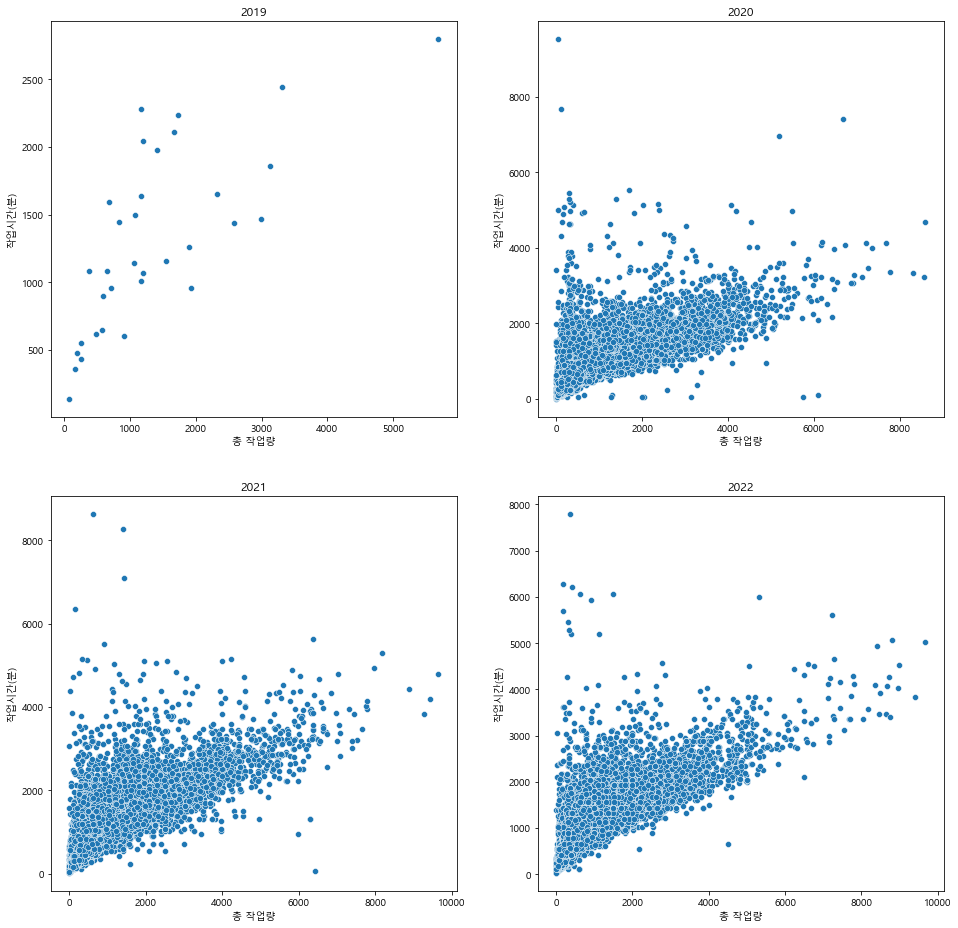

In [38]:
# 년도별 작업량과 작업시간의 상관관계 
years = list(data['입항년도'].unique())
plt.figure(figsize = (16, 16))

for i, year in enumerate(years):
    dummy = data[data['입항년도'] == year]
    plt.subplot(2, 2, i+1)
    sns.scatterplot(dummy['총 작업량'], data['작업시간(분)'])
    plt.title(year)
plt.show()

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\N\anaconda3\lib\site-pack

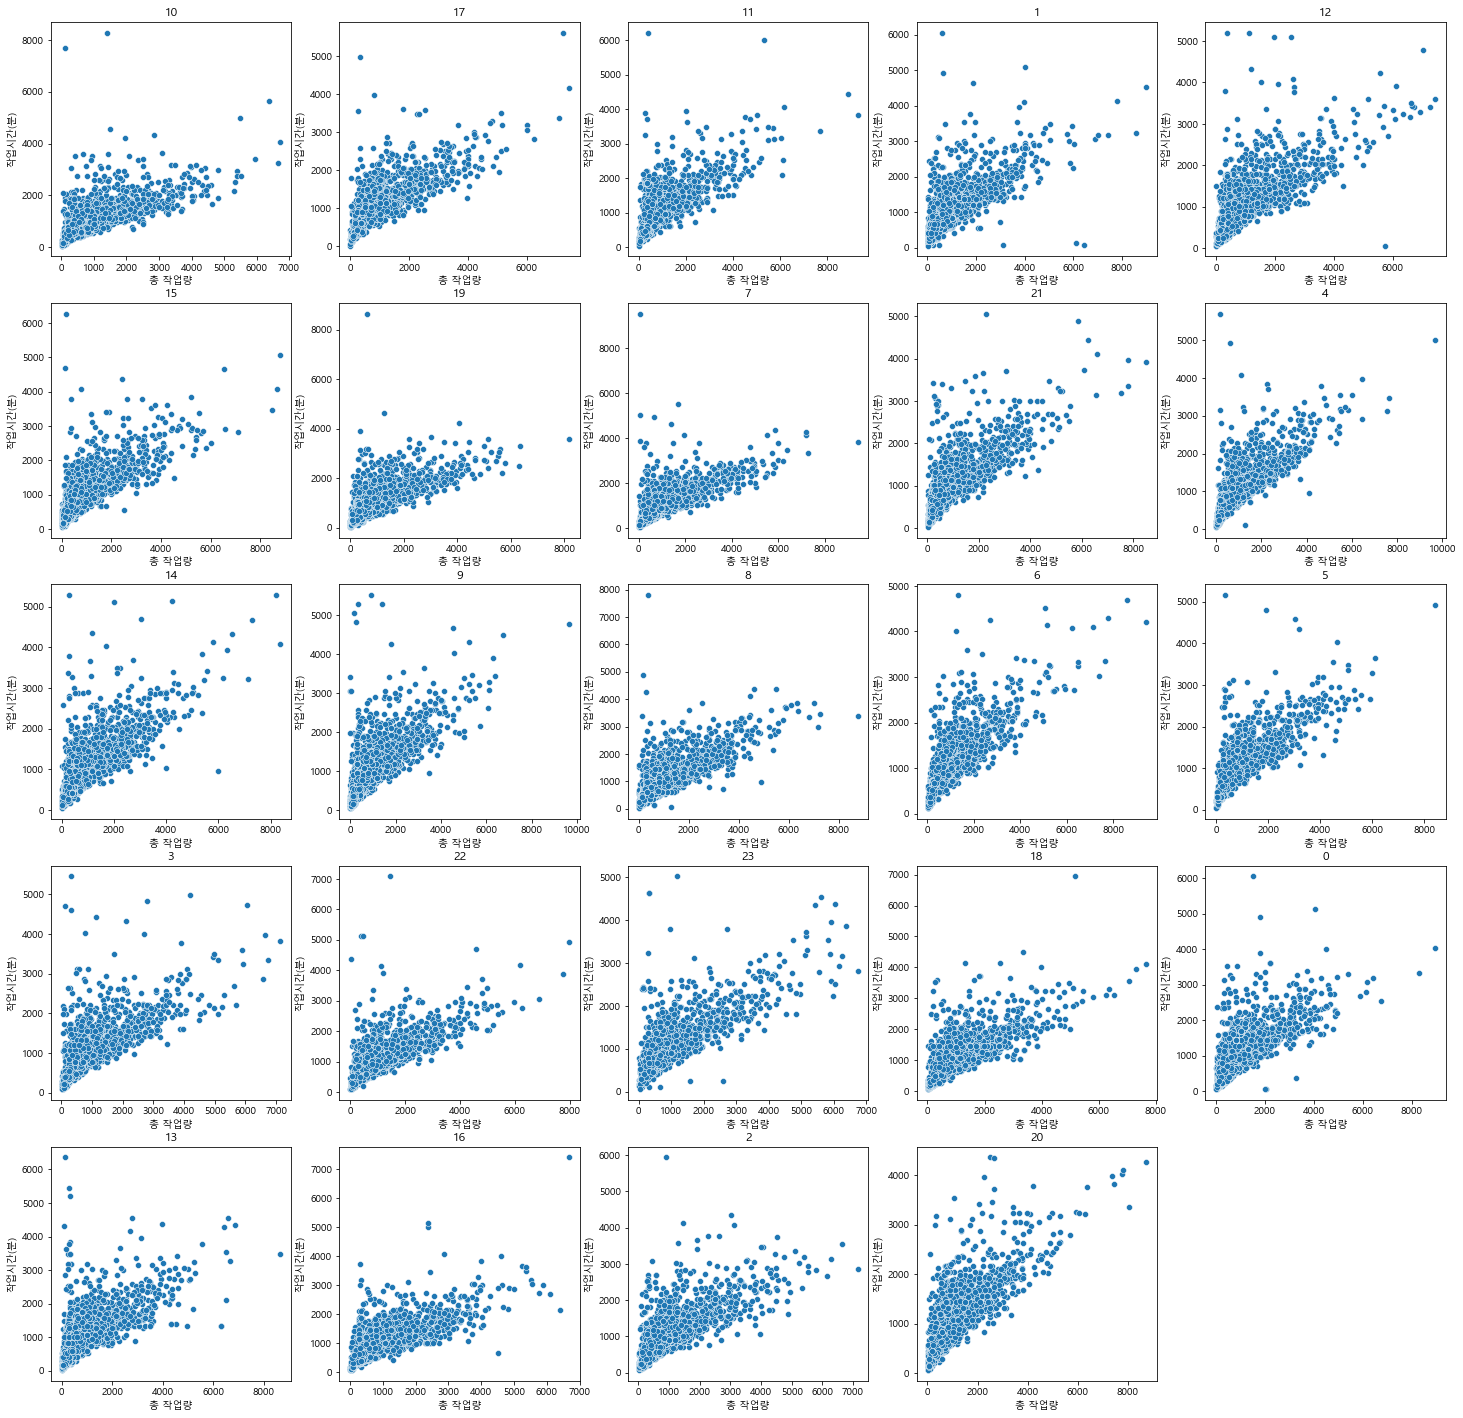

In [39]:
# 시간대별 작업량과 작업시간의 상관관계 
hours = list(data['입항시'].unique())
plt.figure(figsize = (25, 25))

for i, hour in enumerate(hours):
    dummy = data[data['입항시'] == hour]
    plt.subplot(5, 5, i+1)
    sns.scatterplot(dummy['총 작업량'], data['작업시간(분)'])
    plt.title(hour)
plt.show()

In [40]:
ctab1 = pd.crosstab(data['TERMINAL'], data['입항년도'])
ctab1

입항년도,2019,2020,2021,2022
TERMINAL,,,,
BCT,0,0,0,34
BIT,4,1818,1596,1088
BNCT,3,1019,982,689
BNMT,0,608,1058,548
BPTC,4,3188,2767,1696
DDCT,0,0,73,79
DPCT,3,1230,1039,587
E1CT,0,356,308,174
GWCT,3,1536,1947,1132


KeyboardInterrupt: 

C:\Users\N\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\N\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


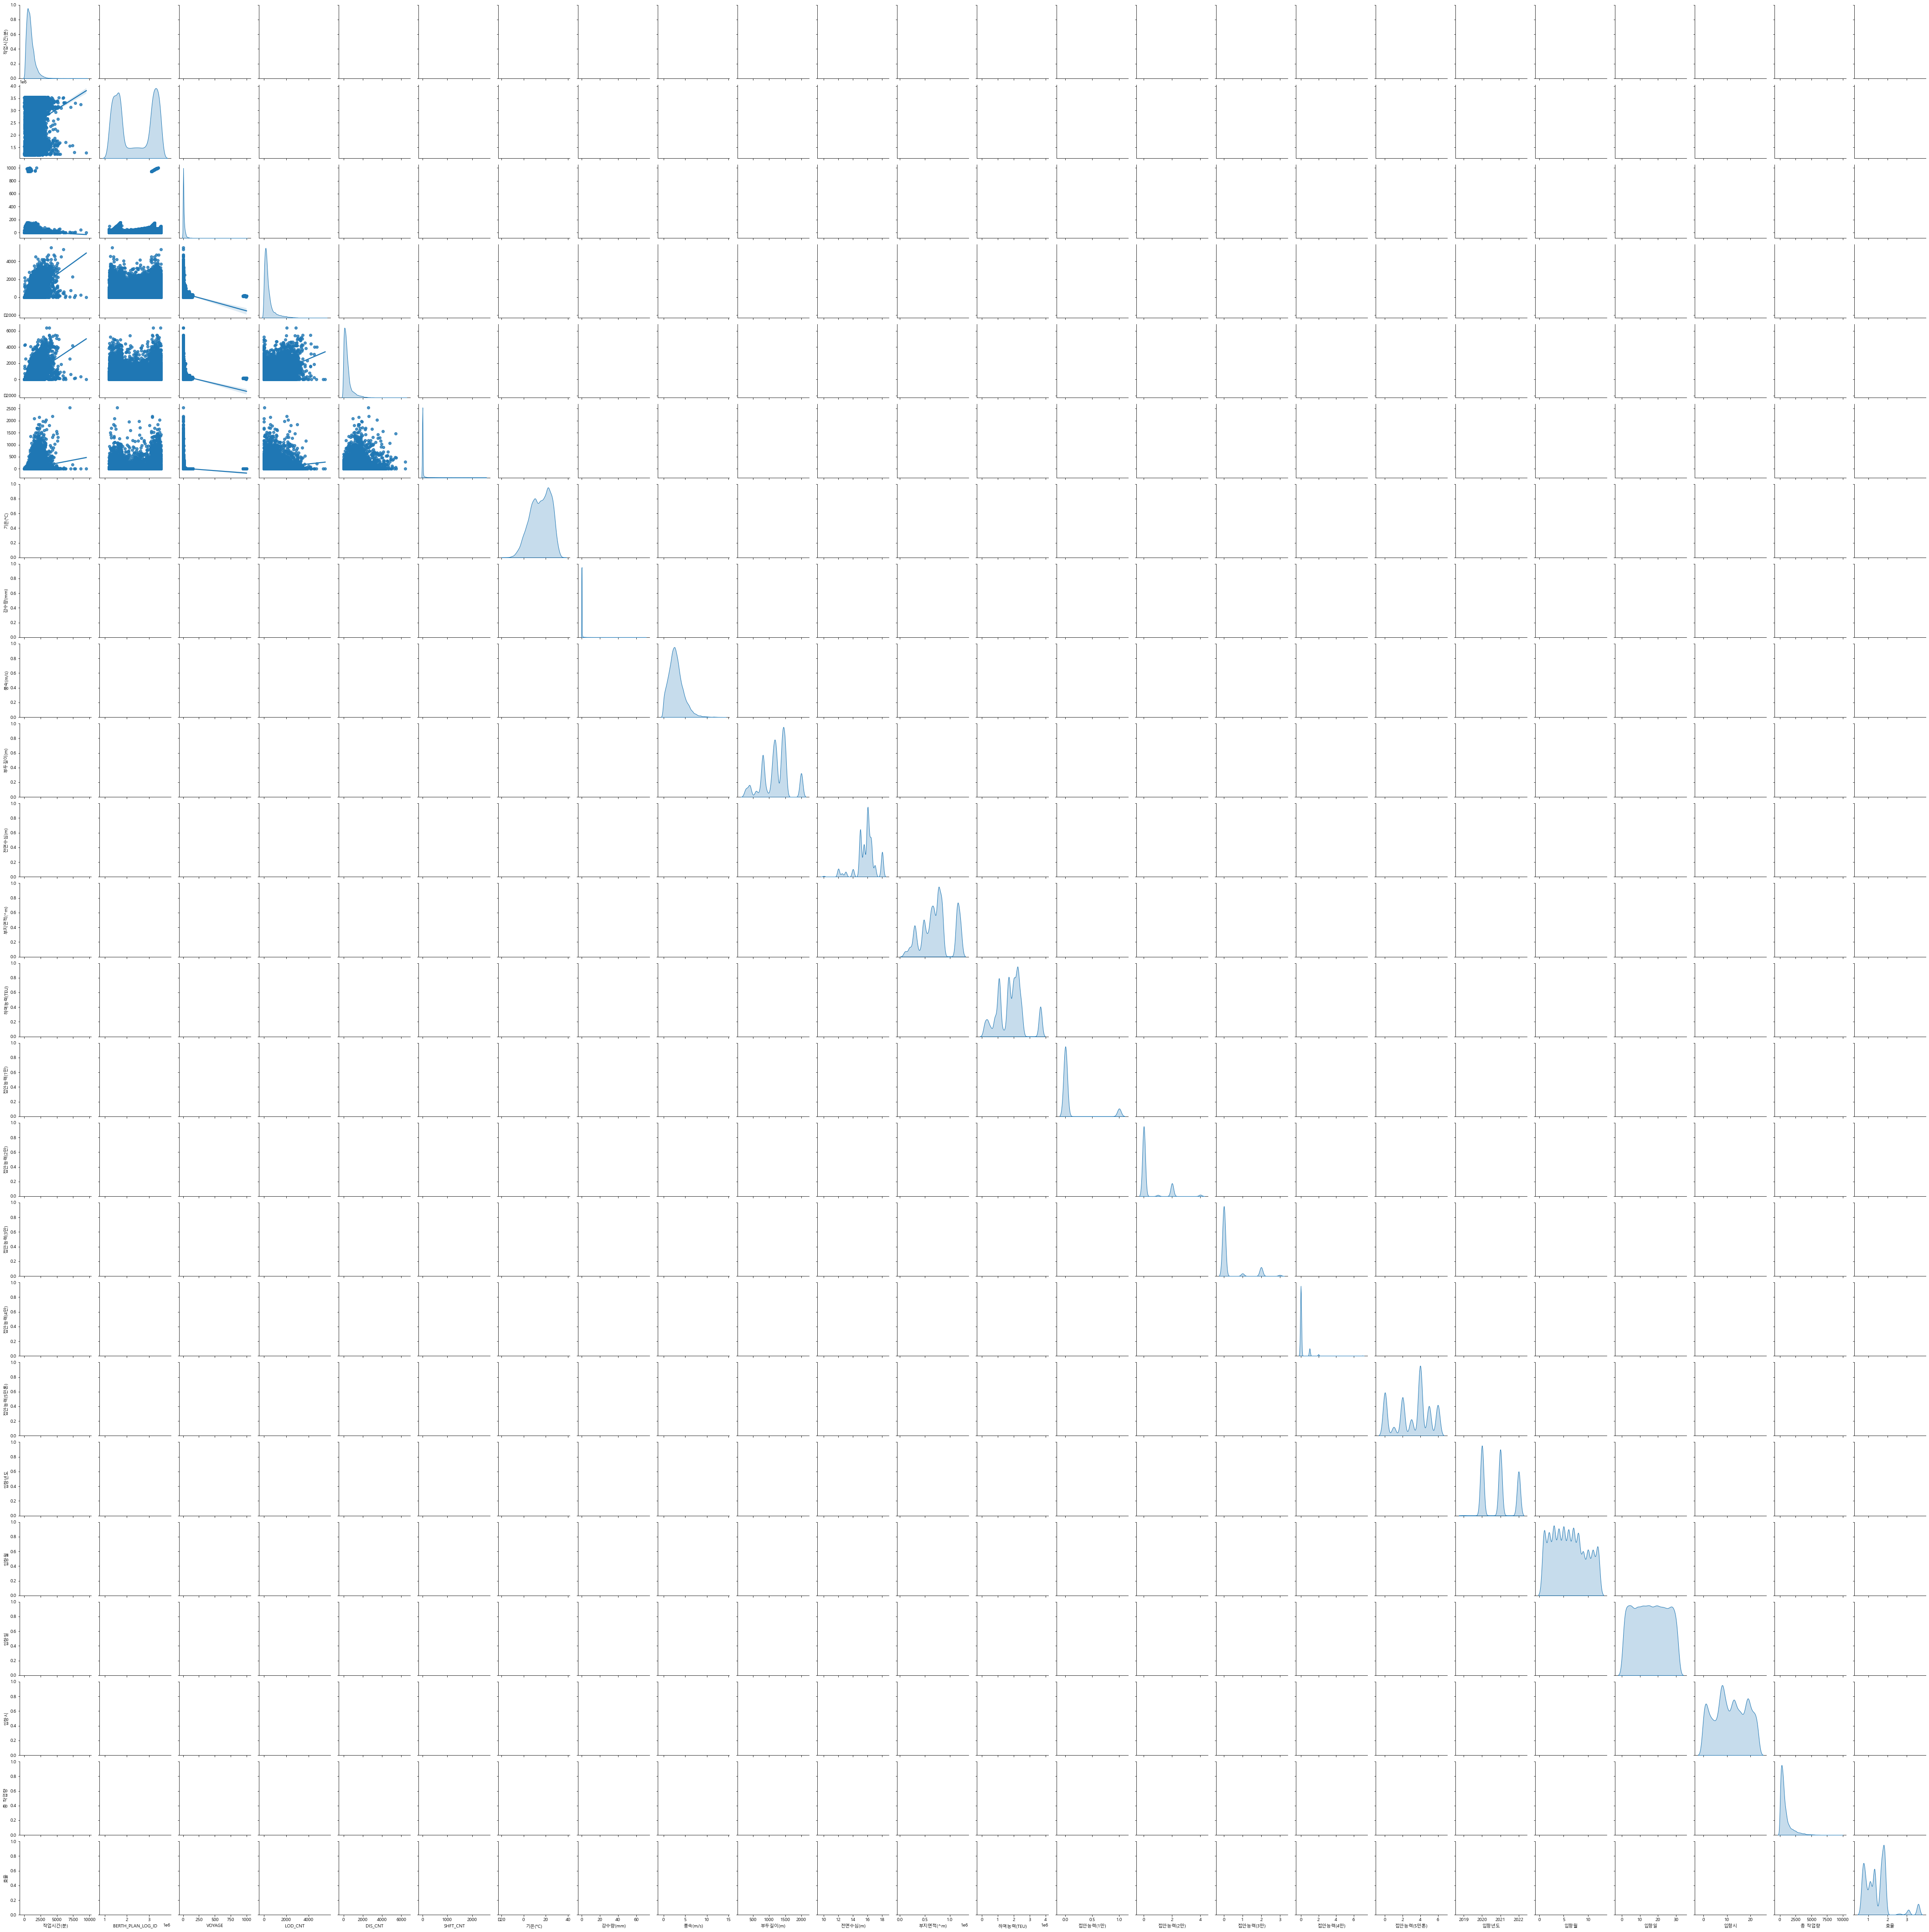